#BemoulliNB 이진분류

In [ ]:
import pandas as pd
spam = pd.read_csv('/content/drive/MyDrive/datasets/spam.csv', encoding = 'utf-8')
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [ ]:
spam.isna().sum()

Unnamed: 0       0
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
spam.drop(columns = ['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
import numpy as np
spam['label'] = np.where(spam['v1']=='spam', 1, 0)
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
from sklearn.model_selection import train_test_split
x = spam['v2']
y = spam['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True) #벡터로 변환
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(3900, 7175)

In [ ]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(cv.inverse_transform(encoded_input[[0]])) #역 변환

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [ ]:
print(cv.get_feature_names_out()[1000:1010],end = '')

['at' 'ate' 'athletic' 'athome' 'atlanta' 'atlast' 'atm' 'attach'
 'attached' 'attack']

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [ ]:
from sklearn.metrics import accuracy_score
x_testcv = cv.transform(x_test) #벡터화 후 모델에 넣음
pred = bnb.predict(x_testcv)
acc = accuracy_score(y_test, pred)
print('Accurecy_score {}'.format(acc))


Accurecy_score 0.9754784688995215


In [ ]:
from sklearn.metrics import RocCurveDisplay
dir(RocCurveDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'from_estimator',
 'from_predictions',
 'plot']

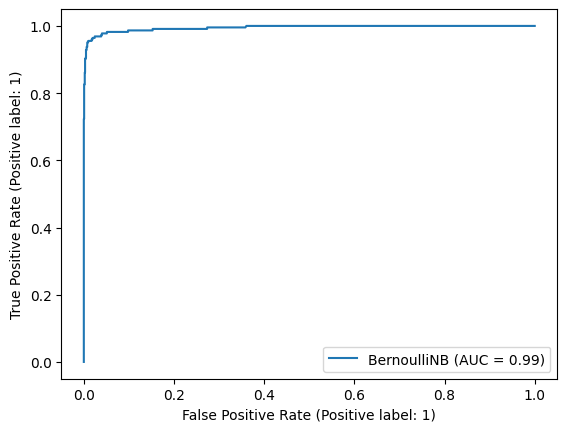

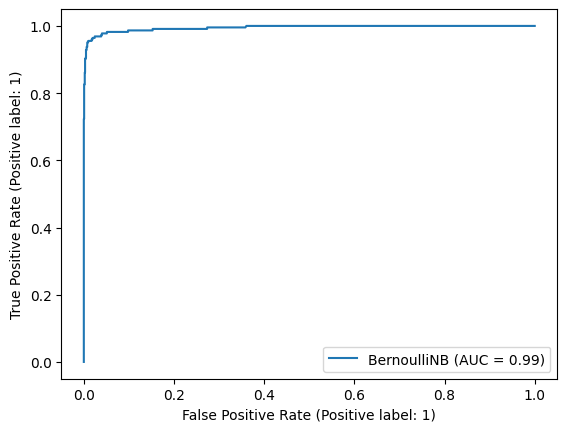

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
roc_dis = RocCurveDisplay.from_estimator(bnb, x_testcv, y_test)
roc_dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

